In [1]:
from keras.datasets import cifar10

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

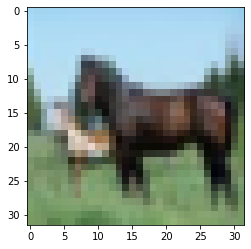

In [6]:
plt.imshow(x_train[12])

In [7]:
x_train.max()

255

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
from keras.utils import to_categorical

In [12]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [13]:
from keras.models import Sequential

In [14]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [15]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

# 128,256,512
model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [17]:
model.fit(x_train,y_cat_train,verbose=1,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.7488 - accuracy: 0.3678
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1998 - accuracy: 0.5757
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0221 - accuracy: 0.6439
Epoch 4/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.9041 - accuracy: 0.6901
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8178 - accuracy: 0.7189
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7653 - accuracy: 0.7423
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7083 - accuracy: 0.7603
Epoch 8/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6671 - accuracy: 0.7732
Epoch 9/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6369 - accuracy: 0.7837
Epoch 10/10
1563/1563 [==============================] - 19s 12m

In [18]:
model.metrics_names

['loss', 'accuracy']

In [19]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.1877 - accuracy: 0.6828


[1.187677264213562, 0.6827999949455261]

In [20]:
from sklearn.metrics import classification_report

In [21]:
predictions = model.predict_classes(x_test)

d:\study\envs\python_cv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.58      0.67      0.62      1000
           1       0.59      0.85      0.70      1000
           2       0.68      0.34      0.46      1000
           3       0.49      0.30      0.37      1000
           4       0.51      0.61      0.56      1000
           5       0.70      0.28      0.40      1000
           6       0.71      0.72      0.71      1000
           7       0.69      0.68      0.68      1000
           8       0.60      0.77      0.68      1000
           9       0.54      0.78      0.64      1000

    accuracy                           0.60     10000
   macro avg       0.61      0.60      0.58     10000
weighted avg       0.61      0.60      0.58     10000

